In [1]:
import os
import subprocess
import re
import numpy as np
import datetime
import itertools
from functools import reduce
import pandas as pd
from utils import *
from matplotlib import pyplot as plt
from IPython import display, get_ipython


# cleanup()

In [2]:
swetest = "/home/username/Data/astro/swe_unix/src/swetest"
exportPath = '/home/username/Data/astro/data_new/' + 'astrooriginal/'
marketPath = '/home/username/Data/markets/DND/'
imgPath = '/home/username/Pictures/np/Other/'

center = (
    'geo'
    # 'helio'
    )

In [3]:
ephes = {
"declination":     [swetest + " -pbody -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
"longitude":       [swetest + " -pbody -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
# "latitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fb -roundmin -g, -head -hor -sid30"],
# "distance":        [swetest + " -pbody -b1.1.year -ndays -s1 -fw -roundmin -g, -head -hor -sid30"],
# "speed":           [swetest + " -pbody -b1.1.year -ndays -s1 -fs -roundmin -g, -head -hor -sid30"],
# "right_asc":       [swetest + " -pbody -b1.1.year -ndays -s1 -fa -roundmin -g, -head -hor -sid30"],
# "meridian_dst":    [swetest + " -pbody -b1.1.year -ndays -s1 -fm -roundmin -g, -head -hor -sid30"],
# "zenith_dst":      [swetest + " -pbody -b1.1.year -ndays -s1 -fz -roundmin -g, -head -hor -sid30"],
# "azimuth":         [swetest + " -pbody -b1.1.year -ndays -s1 -fi -roundmin -g, -head -hor -sid30"],
# "altitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fh -roundmin -g, -head -hor -sid30"],
# "ecliptical":      [swetest + " -pbody -b1.1.year -ndays -s1 -fX -roundmin -g, -head -hor -sid30"],
# "equatorial":      [swetest + " -pbody -b1.1.year -ndays -s1 -fx -roundmin -g, -head -hor -sid30"],
# "uv_ecliptical":   [swetest + " -pbody -b1.1.year -ndays -s1 -fU -roundmin -g, -head -hor -sid30"],
# "uv_equatorial":   [swetest + " -pbody -b1.1.year -ndays -s1 -fu -roundmin -g, -head -hor -sid30"],
# "house_pos":       [swetest + " -pbody -b1.1.year -ndays -s1 -fg -roundmin -g, -head -hor -sid30"],
# "house_num":       [swetest + " -pbody -b1.1.year -ndays -s1 -fj -roundmin -g, -head -hor -sid30"],
# "zodiac":          [swetest + " -pbody -b1.1.year -ndays -s1 -fZ -roundmin -g, -head -hor -sid30"],
# "sirius_dec":          [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
# "sirius_long":          [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
}

bephes = {
'sun':     [swetest + " -pbody -d0 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'moon':    [swetest + " -pbody -d1 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
# "earth":[swetest + " -pbody -dC -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
'mercury': [swetest + " -pbody -d2 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'venus':   [swetest + " -pbody -d3 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'mars':    [swetest + " -pbody -d4 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'jupiter': [swetest + " -pbody -d5 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'saturn':  [swetest + " -pbody -d6 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'uranus':  [swetest + " -pbody -d7 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'neptune': [swetest + " -pbody -d8 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"],
'pluto':   [swetest + " -pbody -d9 -b1.1.year -ndays -s1 -fkey -roundmin -g, -head -hor -sid30"], 
    


}

keys = [
# 'd',
'l', # ok
# 'b',
# 'w',
# 's',
# 'a', # ok
# 'm', # meh
# 'z',
# 'i', # eh
# 'h', # well
# 'X', 
# 'x',
# 'U',
# 'u',
# 'g', # meh
# 'j', # just not good
# 'Z', # fine
]


start = 2010
end = 2030

years = range(start, end)
# body = '0123456789'
# body = '0C23456789'
body = '0123456789'

In [4]:
def createEphemeris(year,body,ephe,key=None):

    days = checkLeap(year)
    
    try:
        command = ephes[ephe][0]
    except KeyError:
        command = bephes[ephe][0]
    
    command = updateCommand(command,body,year,days,center,key)
    
    
    # try:
    #     e = ephe.split('_')[0]
    # except ValueError:
    #     pass
        
        
    
    print(command)
    process = subprocess.Popen(command,
    shell=True,
    stdin=None,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE )
    lines = process.communicate()[0].decode('utf-8').splitlines()


    if key:
        if not os.path.exists(exportPath + str(year) + '/csv/' + key):
            os.makedirs(exportPath + str(year) + '/csv/' + key)

        f = open(exportPath + str(year) + '/csv/' + key + '/' + ephe + ".csv", "w+")
        
    else:
        if not os.path.exists(exportPath + str(year) + '/csv/'):
            os.makedirs(exportPath + str(year) + '/csv/')

        f = open(exportPath + str(year) + '/csv/' + ephe + ".csv", "w+")
        
    def writeLine(l, body, ephe, key=None):
        if ephe == 'zodiac':
            l = coorZodiac(l)
            # l = coorZodiac0(l)
        if key == 'Z':
            l = coorZodiac(l)
            # l = coorZodiac0(l)
        else: 
            l = cleanLine(l)
            
        if key:
            f = open(exportPath + str(year) + '/csv/' + key + '/' + ephe + ".csv", "a")
        else:
            f = open(exportPath + str(year) + '/csv/' + ephe + ".csv", "a")

        f.write(l + '\n')
        f.close()
        
    list(map(lambda l: writeLine(l, body, ephe, key), lines))

In [5]:
list(map(lambda year: list(map(lambda ephe: createEphemeris(year, body, ephe), list(ephes))), years))
list(map(lambda year: list(map(lambda bephe: list(map(lambda key: createEphemeris(year, body, bephe, key), keys)), list(bephes))), years))

/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2010 -n365 -s1 -fd -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2010 -n365 -s1 -fl -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2011 -n365 -s1 -fd -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2011 -n365 -s1 -fl -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2012 -n366 -s1 -fd -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2012 -n366 -s1 -fl -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2013 -n365 -s1 -fd -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2013 -n365 -s1 -fl -roundmin -g, -head -hor -sid30
/home/u1/Data/astro/swe_unix/src/swetest -p0123456789 -b1.1.2014 -n365 -s1 -fd -roundmin -g, -head -hor -sid30
/

[[[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None]],
 [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
 

In [6]:
# z = ['0.0', '66.7', '-5.38', '34.24', '41.37', '-3.2', '11.23', '112.41', '66.15', '12.23']


# x = ", ".join(z)

# print(x)

In [7]:
planets = ["sun", "moon", "mercury", "venus", "mars", "jupiter", "saturn", "uranus", "neptune", "pluto"]
# planets = ["sun", "mercury", "venus", "mars", "jupiter", "saturn", "uranus", "neptune", "pluto"]

valency = {
# 'earth':    [1,1,1,1,-1,1,-1,-1,1,-1],        
'moon':    [1,1,1,1,-1,1,-1,-1,1,-1],
'sun':     [1,1,1,1,-1,1,-1,1,-1,-1],
'mercury': [1,1,1,1,-1,1,-1,1,1,-1],
'venus':   [1,1,1,1,-1,1,-1,1,1,1],
'mars':    [-1,-1,-1,-1,1,-1,-1,-1,-1,-1],
'jupiter': [1,1,1,1,-1,1,-1,-1,1,-1],
'saturn':  [-1,-1,-1,-1,-1,-1,1,-1,-1,-1],
'uranus':  [-1,1,1,1,-1,-1,-1,1,-1,-1],
'neptune': [1,-1,1,1,-1,1,-1,-1,1,-1],
'pluto':   [-1,-1,-1,1,-1,-1,-1,-1,-1,1]
}

# valency = {
# 'sun':      [0.52651696129957, 0.5185891325071497, 0.5230692076228686, 0.5281116711903838, 0.5143626570915619, 0.5292728989612843, 0.5359508041627247, 0.5300859598853869, 0.5306513409961686, 0.5254398478364242],
# 'moon':     [0.5185891325071497, 0.52651696129957, 0.5291586998087954, 0.5247148288973384, 0.523719165085389, 0.5319451017510648, 0.5402956604673342, 0.5204957102001907, 0.527764594209777, 0.5233111322549953],
# 'mercury':  [0.5230692076228686, 0.5291586998087954, 0.52651696129957, 0.520910780669145, 0.530852994555354, 0.5174224343675418, 0.5251162790697674, 0.5253915519696251, 0.5354406130268199, 0.53515625],
# 'venus':    [0.5281116711903838, 0.5247148288973384, 0.520910780669145, 0.52651696129957, 0.5409153952843273, 0.5210727969348659, 0.5290086797624486, 0.5401785714285714, 0.531986531986532, 0.5286322763842878],
# 'mars':     [0.5143626570915619, 0.523719165085389, 0.530852994555354, 0.5409153952843273, 0.52651696129957, 0.522962962962963, 0.518957345971564, 0.5261023821591485, 0.5210674157303371, 0.5255152109911678],
# 'jupiter':  [0.5292728989612843, 0.5319451017510648, 0.5174224343675418, 0.5210727969348659, 0.522962962962963, 0.52651696129957, 0.5397779833487512, 0.5023314963967783, 0.5074092999489014, 0.5275515093435553],
# 'saturn':   [0.5359508041627247, 0.5402956604673342, 0.5251162790697674, 0.5290086797624486, 0.518957345971564, 0.5397779833487512, 0.52651696129957, 0.5349364791288567, 0.5002251238180999, 0.532462229481421],
# 'uranus':   [0.5300859598853869, 0.5204957102001907, 0.5253915519696251, 0.5401785714285714, 0.5261023821591485, 0.5023314963967783, 0.5349364791288567, 0.52651696129957, 0.5291327913279132, 0.5486274509803921],
# 'neptune':  [0.5306513409961686, 0.527764594209777, 0.5354406130268199, 0.531986531986532, 0.5210674157303371, 0.5074092999489014, 0.5002251238180999, 0.5291327913279132, 0.52651696129957, 0],
# 'pluto':    [0.5254398478364242, 0.5233111322549953, 0.53515625, 0.5286322763842878, 0.5255152109911678, 0.5275515093435553, 0.532462229481421, 0.5486274509803921, 0, 0.52651696129957]}

aspects = [
    0,
    180,
    90,
    120,
    60,

    # 30,
    # 150,
    # 72,
    # 144,
    # 45,
    # 135,
    # 36,
    # 108
]

# aspect_planets = [
# ["mercury","pluto"],
# ["mercury","neptune"],
# ["mercury","uranus"],
# ["mercury","saturn"],
# ["mercury","jupiter"],
# ["mercury","mars"],
# ["mercury","sun"],
# ["mercury","venus"],
# ["venus","pluto"],
# ["venus","neptune"],
# ["venus","uranus"],
# ["venus","saturn"],
# ["venus","jupiter"],
# ["venus","mars"],
# ["sun","pluto"],
# ["sun","neptune"],
# ["sun","uranus"],
# ["sun","saturn"],
# ["sun","jupiter"],
# ["sun","venus"],
# ["mars","pluto"],
# ["mars","neptune"],
# ["mars","uranus"],
# ["mars","saturn"],
# ["mars","sun"],
# ["mars","jupiter"],

# ["jupiter","pluto"],
# ["jupiter","neptune"],
# ["jupiter","uranus"],
# ["jupiter","saturn"],
# ["saturn","pluto"],
# ["saturn","neptune"],
# ["saturn","uranus"],
# ["uranus","pluto"],
# ["uranus","neptune"],
# ["neptune","pluto"]
# ]

In [8]:
def createAspect(year, key, aspect, planet):
    print(year, key, aspect, planet)

    df = pd.read_csv(exportPath + str(year) + '/csv/' + key + '/' + planet  + ".csv", header=None, sep=",")

    
    def _col(col):
        
        column = df.iloc[:, col]
        
        v = valency[planet][col]

        def _calAspect(n):
            # column[n] = abs(column[n])
            if aspect == 60:
                if column[n] <= aspect + 15 and column[n] >= aspect - 15:
                    column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * 10 # v60
                else:
                    column[n] = 0
                    
            if aspect == 120:
                if column[n] <= aspect + 15 and column[n] >= aspect - 15:
                    column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * 10 # v120
                else:
                    column[n] = 0  
                    
            if aspect == 90:
                if column[n] <= aspect + 15 and column[n] >= aspect - 15:
                    column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * -10 # v90
                else:
                    column[n] = 0                      

            if aspect == 180:
                if column[n] <= aspect + 15 and column[n] >= aspect - 15:
                    column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * -10 # v180
                else:
                    column[n] = 0
             

            if aspect == 0:
                if column[n] <= aspect + 15 and column[n] >= aspect - 15:
                    column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * 10 * v # v0
                else:
                    column[n] = 0
                    
            # else:
            #     if column[n] <= aspect + 15 and column[n] >= aspect - 15:
            #         column[n] = np.cos((((column[n] - aspect) / 360) / 10) * 360) * 10 * v
            #     else:
            #         column[n] = 0                    
            
        list(map(lambda row: _calAspect(row), range(len(column))))
        
    list(map(lambda col: _col(col), df))
    
    if not os.path.exists(exportPath + str(year) + '/csv/' + key + '/' +  str(aspect)):
        os.makedirs(exportPath + str(year) + '/csv/'  + key + '/' + str(aspect))

    path = exportPath + str(year) + '/csv/'  + key + '/' + str(aspect) + '/' + planet + ".csv"
    

    df.to_csv(path, header=None, index=False)



In [9]:
# if you get an error make sure you link ephe to /users in /

list(map(lambda year: list(map(lambda key: list(map(lambda aspect: list(map(lambda planet: createAspect(year, key, aspect, planet), planets)), aspects)), keys)), years))

2010 l 0 sun
2010 l 0 moon
2010 l 0 mercury
2010 l 0 venus
2010 l 0 mars
2010 l 0 jupiter
2010 l 0 saturn
2010 l 0 uranus
2010 l 0 neptune
2010 l 0 pluto
2010 l 180 sun
2010 l 180 moon
2010 l 180 mercury
2010 l 180 venus
2010 l 180 mars
2010 l 180 jupiter
2010 l 180 saturn
2010 l 180 uranus
2010 l 180 neptune
2010 l 180 pluto
2010 l 90 sun
2010 l 90 moon
2010 l 90 mercury
2010 l 90 venus
2010 l 90 mars
2010 l 90 jupiter
2010 l 90 saturn
2010 l 90 uranus
2010 l 90 neptune
2010 l 90 pluto
2010 l 120 sun
2010 l 120 moon
2010 l 120 mercury
2010 l 120 venus
2010 l 120 mars
2010 l 120 jupiter
2010 l 120 saturn
2010 l 120 uranus
2010 l 120 neptune
2010 l 120 pluto
2010 l 60 sun
2010 l 60 moon
2010 l 60 mercury
2010 l 60 venus
2010 l 60 mars
2010 l 60 jupiter
2010 l 60 saturn
2010 l 60 uranus
2010 l 60 neptune
2010 l 60 pluto
2011 l 0 sun
2011 l 0 moon
2011 l 0 mercury
2011 l 0 venus
2011 l 0 mars
2011 l 0 jupiter
2011 l 0 saturn
2011 l 0 uranus
2011 l 0 neptune
2011 l 0 pluto
2011 l 180 sun
2

[[[[None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None]]],
 [[[None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None]]],
 [[[None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None],
   [None, None, None, None, None, None, None, None, None, None]]],
 [[[None, None, Non

In [10]:
# path = exportPath + str(1945) + '/csv/' + 'l' + '/' + str(0) + '/' + 'venus' + ".csv"
# df = pd.read_csv(path, header=None, sep=",")

# %matplotlib inline

# # %config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
# # %config InlineBackend.print_figure_kwargs={'edgecolor' : "w"}
# # plt.rcParams['axes.facecolor'] = 'w'
# # plt.rcParams['axes.edgecolor'] = 'w'
# plt.rcParams['savefig.facecolor'] = 'w'



# fig, ax_left = plt.subplots(figsize=(20,10))
# ax_right = ax_left.twinx()
# df.plot(xlabel="\nTime ", ylabel="Scale\n", ax=ax_left)

# ax_left.xaxis.label.set_size(20)
# ax_left.yaxis.label.set_size(20)
# ax_left.tick_params(axis='both', which='both', labelsize=15)
# ax_left.set_title('ephemeris', fontsize=20, fontweight="bold")
# ax_left.grid(color='b', linestyle='-', linewidth=2, which='both', alpha=0.1)
# ax_left.set_facecolor((0.8,0.8,0.8, 0.3))
# ax_left.grid(True)
# ax_right.grid(False)
# ax_right.xaxis.label.set_size(20)
# ax_right.yaxis.label.set_size(20)

# # ax_left.legend(['BTC', 'Dollar', 'Volatility'])
# # ax_right.legend(['BS'], loc=2)



In [11]:
# path = exportPath + str(1946) + '/csv/' + 'l' + '/' + str(0) + '/' + 'venus' + ".csv"
# df = pd.read_csv(path, header=None, sep=",")

# %matplotlib inline

# # %config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
# # %config InlineBackend.print_figure_kwargs={'edgecolor' : "w"}
# # plt.rcParams['axes.facecolor'] = 'w'
# # plt.rcParams['axes.edgecolor'] = 'w'
# plt.rcParams['savefig.facecolor'] = 'w'



# fig, ax_left = plt.subplots(figsize=(20,10))
# ax_right = ax_left.twinx()
# df.plot(xlabel="\nTime ", ylabel="Scale\n", ax=ax_left)

# ax_left.xaxis.label.set_size(20)
# ax_left.yaxis.label.set_size(20)
# ax_left.tick_params(axis='both', which='both', labelsize=15)
# ax_left.set_title('ephemeris', fontsize=20, fontweight="bold")
# ax_left.grid(color='b', linestyle='-', linewidth=2, which='both', alpha=0.1)
# ax_left.set_facecolor((0.8,0.8,0.8, 0.3))
# ax_left.grid(True)
# ax_right.grid(False)
# ax_right.xaxis.label.set_size(20)
# ax_right.yaxis.label.set_size(20)

# # ax_left.legend(['BTC', 'Dollar', 'Volatility'])
# # ax_right.legend(['BS'], loc=2)



In [12]:
# Mercury_Pluto
# Mercury_Neptune
# Mercury_Uranus
# Mercury_Saturn
# Mercury_Jupiter
# Mercury_Mars
# Mercury_Sun
# Mercury_Venus
# Venus_Pluto
# Venus_Neptune
# Venus_Uranus
# Venus_Saturn
# Venus_Jupiter
# Venus_Mars
# Sun_Pluto
# Sun_Neptune
# Sun_Uranus
# Sun_Saturn
# Sun_Jupiter
# Sun_Venus
# Mars_Pluto
# Mars_Neptune
# Mars_Uranus
# Mars_Saturn
# Mars_Sun
# Mars_Jupiter

# Jupiter_Pluto
# Jupiter_Neptune
# Jupiter_Uranus
# Jupiter_Saturn
# Saturn_Pluto
# Saturn_Neptune
# Saturn_Uranus
# Uranus_Pluto
# Uranus_Neptune
# Neptune_Pluto

synodic = {
"long":["jupiter","saturn","uranus","neptune"],
"middle":["sun","mercury","venus","mars"],
# "short":["moon"]
# "short":["earth"]
}

In [13]:
def createSynodicSum(term, year):
    s_df = []
    
    def calSum(body, aspect, key, term, year):
        print(body, aspect, key, term, year)
        path = exportPath + str(year) + '/csv/' + key + '/' + str(aspect) + '/' + body + ".csv"
        df = pd.read_csv(path, header=None, sep=",")
        
# with moon        
#         if term == "middle":
#             if body == 'mercury':
#                 s_df.append(df.iloc[:, [0,3,4,5,6,7,8,9]].sum(axis=1))
#             elif body == 'venus':
#                 s_df.append(df.iloc[:, [4,5,6,7,8,9]].sum(axis=1))      
#             elif body == 'sun':
#                 s_df.append(df.iloc[:, [3,5,6,7,8,9]].sum(axis=1))   
#             elif body == 'mars':
#                 s_df.append(df.iloc[:, [0,5,6,7,8,9]].sum(axis=1))      
                
#         elif term == "long":
#             if body == 'jupiter':
#                 s_df.append(df.iloc[:, [6,7,8,9]].sum(axis=1))
#             elif body == 'saturn':
#                 s_df.append(df.iloc[:, [7,8,9]].sum(axis=1))      
#             elif body == 'uranus':
#                 s_df.append(df.iloc[:, [8,9]].sum(axis=1))   
#             elif body == 'neptune':
#                 s_df.append(df.iloc[:, [9]].sum(axis=1))     


#         if term == "middle":
#             if body == 'mercury':
#                 s_df.append(df.iloc[:, [0,3,4,5,6,7,8,9]].sum(axis=1)/8)
#             elif body == 'venus':
#                 s_df.append(df.iloc[:, [4,5,6,7,8,9]].sum(axis=1)/6)      
#             elif body == 'sun':
#                 s_df.append(df.iloc[:, [3,5,6,7,8,9]].sum(axis=1)/6)   
#             elif body == 'mars':
#                 s_df.append(df.iloc[:, [0,5,6,7,8,9]].sum(axis=1)/6)      
                
#         elif term == "long":
#             if body == 'jupiter':
#                 s_df.append(df.iloc[:, [6,7,8,9]].sum(axis=1)/4)
#             elif body == 'saturn':
#                 s_df.append(df.iloc[:, [7,8,9]].sum(axis=1)/3)      
#             elif body == 'uranus':
#                 s_df.append(df.iloc[:, [8,9]].sum(axis=1)/2)   
#             elif body == 'neptune':
#                 s_df.append(df.iloc[:, [9]].sum(axis=1))   
                
# no moon                
        if term == "middle":
            if body == 'mercury':
                s_df.append(df.iloc[:, [0,2,3,4,5,6,7,8]].sum(axis=1))
            elif body == 'venus':
                s_df.append(df.iloc[:, [3,4,5,6,7,8]].sum(axis=1))      
            elif body == 'sun':
                s_df.append(df.iloc[:, [2,4,5,6,7,8]].sum(axis=1))   
            elif body == 'mars':
                s_df.append(df.iloc[:, [0,4,5,6,7,8]].sum(axis=1))      
                
        elif term == "long":
            if body == 'jupiter':
                s_df.append(df.iloc[:, [5,6,7,8]].sum(axis=1))
            elif body == 'saturn':
                s_df.append(df.iloc[:, [6,7,8]].sum(axis=1))      
            elif body == 'uranus':
                s_df.append(df.iloc[:, [7,8]].sum(axis=1))   
            elif body == 'neptune':
                s_df.append(df.iloc[:, [8]].sum(axis=1))  
                
                


                
#         if term == "middle":
#             if body == 'mercury':
#                 s_df.append(df.iloc[:, [0,2,3,4,5,6,7,8]].sum(axis=1))
#             elif body == 'venus':
#                 s_df.append(df.iloc[:, [3,4,5,6,7,8]].sum(axis=1))      
#             elif body == 'sun':
#                 s_df.append(df.iloc[:, [2,4,5,6,7,8]].sum(axis=1))   
#             elif body == 'mars':
#                 s_df.append(df.iloc[:, [0,4,5,6,7,8]].sum(axis=1))      
                
#         elif term == "long":
#             if body == 'jupiter':
#                 s_df.append(df.iloc[:, [5,6,7,8]].mul(5).sum(axis=1))
#             elif body == 'saturn':
#                 s_df.append(df.iloc[:, [6,7,8]].mul(5).sum(axis=1))      
#             elif body == 'uranus':
#                 s_df.append(df.iloc[:, [7,8]].mul(5).sum(axis=1))   
#             elif body == 'neptune':
#                 s_df.append(df.iloc[:, [8]].mul(5).sum(axis=1))                  

        
    list(map(lambda body: list(map(lambda aspect:  list(map(lambda key: calSum(body, aspect, key, term, year), keys)), aspects)), synodic[term]))  
        
    # s_sum = reduce(lambda x, y: x.add(y, fill_value=0), s_df)
    s_sum = pd.DataFrame(s_df)
    # print(s_sum)
    
    s_sum = s_sum.sum()
    
    # if term == "middle":
    #     s_sum = s_sum.sum() / 26
    # elif term == "long":
    #     s_sum = s_sum.sum() / 10
        
    print(s_sum)
    plt.plot(s_sum)

    path = exportPath + str(year) + '/csv/' + "_" + term + "_sum.csv"
    s_sum.to_csv(path, header=None, index=False)


jupiter 0 l long 2010
jupiter 180 l long 2010
jupiter 90 l long 2010
jupiter 120 l long 2010
jupiter 60 l long 2010
saturn 0 l long 2010
saturn 180 l long 2010
saturn 90 l long 2010
saturn 120 l long 2010
saturn 60 l long 2010
uranus 0 l long 2010
uranus 180 l long 2010
uranus 90 l long 2010
uranus 120 l long 2010
uranus 60 l long 2010
neptune 0 l long 2010
neptune 180 l long 2010
neptune 90 l long 2010
neptune 120 l long 2010
neptune 60 l long 2010
0      45.681638
1      45.646277
2      45.605429
3      45.559056
4      45.507125
         ...    
360    35.295894
361    35.307965
362    35.319233
363    35.329758
364    35.339598
Length: 365, dtype: float64
sun 0 l middle 2010
sun 180 l middle 2010
sun 90 l middle 2010
sun 120 l middle 2010
sun 60 l middle 2010
mercury 0 l middle 2010
mercury 180 l middle 2010
mercury 90 l middle 2010
mercury 120 l middle 2010
mercury 60 l middle 2010
venus 0 l middle 2010
venus 180 l middle 2010
venus 90 l middle 2010
venus 120 l middle 2010
venus 

[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

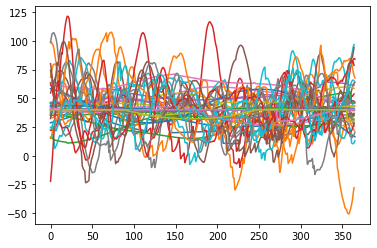

In [14]:
list(map(lambda year: list(map(lambda term: createSynodicSum(term, year), list(synodic))), years))

In [15]:
# def createSynodicSum(term, year):
 
        
        
#     list(map(lambda body: list(map(lambda aspect:  list(map(lambda key: print(body, aspect, key, term, year), bkey)), aspects)),   synodic[term]))  
        


# list(map(lambda year: list(map(lambda term: createSynodicSum(term, year), list(synodic))), years))

In [16]:
def getPotency(year):
    
    path = exportPath + str(year) + '/csv/'
    
    # D = pd.read_csv(path + 'declination.csv', header=None, sep=",").sum(axis=1)
    D = pd.read_csv(path + 'declination.csv', header=None, sep=",")
    D = D[[3,4]].sum(axis=1)
    
    L = pd.read_csv(path + '_long_sum.csv', header=None, sep=",")
    M = pd.read_csv(path + '_middle_sum.csv', header=None, sep=",")
    # S = pd.read_csv(path + '_short_sum.csv', header=None, sep=",")

    P = 5*(L+D)+M
    
    P.iloc[:, 0].to_csv(path + 'siderograph.csv',header=None,index=False)
    

In [17]:
list(map(lambda year: getPotency(year), years))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
bss = []


years = range(start, end)

def readCSV(year):
    path = exportPath + str(year) + '/csv/'
    p = pd.read_csv(path + 'siderograph.csv',header=None)
    bss.append(p)
    
list(map(lambda year: readCSV(year), years))

p = pd.concat(bss, ignore_index=True, axis=0)
# p['timestamp'] = pd.date_range(start='1/1/' + str(start), periods=len(p), freq='D')
base = datetime.datetime(start,1,1)
p['timestamp'] = list(map(lambda x: base + datetime.timedelta(days=x), range(len(p))))

p = p.set_index('timestamp', drop=True)
p.to_csv(marketPath + 'Bradley-Siderograph.csv', sep=',')



In [5]:
def min_max_scaling(df):
    # copy the dataframe
    tdf = df.copy()
    # apply min-max scaling
    for column in tdf.columns:
        tdf[column] = (tdf[column] - tdf[column].min()) / (tdf[column].max() - tdf[column].min())
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)
    return tdf

def log_transform(df):
    # copy the dataframe
    tdf = df.copy()
    # apply log scaling
    for column in tdf.columns:
        tdf[column] = np.log(tdf[column])

    tdf.replace([np.inf, -np.inf], np.nan, inplace=True)
    tdf = tdf.astype(float)
    tdf = tdf.interpolate(method='linear', axis=0).ffill().bfill()
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)

    return tdf

ticker0 = 'BTC'
ticker1 = 'Dollar'
ticker2 = 'S&P'
ticker3 = 'Volatility'

_df = pd.DataFrame()

_df0 = pd.read_csv(marketPath + ticker0 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
_df['y0'] = _df0["close"]

# _df1 = pd.read_csv(marketPath + ticker1 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y1'] = _df1["close"]

# _df3 = pd.read_csv(marketPath + ticker3 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y3'] = _df3["close"]

# _df2 = pd.read_csv(marketPath + ticker2 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y2'] = _df2["close"]



# _df = pd.merge(_df, _df2, left_index=True,right_index=True)

#######################################################################################################

# start_date = '1945-01-01'
# end_date =   '1947-01-01'

# start_date = '2021-01-01'
# end_date =   '2026-01-01'

# start_date = '2022-01-01'
# end_date =   '2023-01-01'

# start_date = '2022-01-01'
# end_date =   '2022-12-21'


# start_date = '2022-04-20'
# end_date =   '2022-06-01'


start_date = '2020-01-01'
end_date =   '2023-01-01'


# start_date = str(start) + '-01-01'
# end_date =   str(end) + '-01-01'


after_start_date = _df.index >= start_date
before_end_date = _df.index <= end_date
between_two_dates = after_start_date & before_end_date
_df = _df.loc[between_two_dates]


#######################################################################################################


# start_date = '2022-01-01'
# end_date =   '2024-01-01'

after_start_date = p.index >= start_date
before_end_date = p.index <= end_date
between_two_dates = after_start_date & before_end_date
p1 = p.loc[between_two_dates]

# print(np.log(abs(p1)))

# p1 = log_transform(abs(p1))

p1 = min_max_scaling(p1)

In [6]:
_df = log_transform(_df)
_df = min_max_scaling(_df)

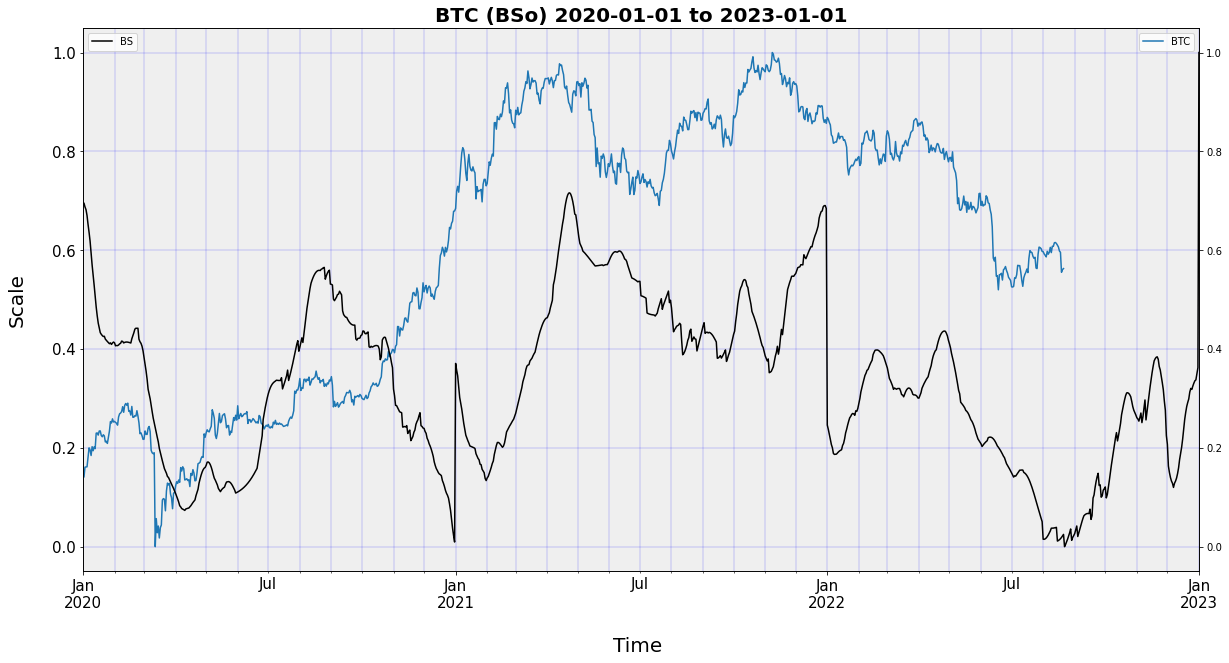

In [7]:
%matplotlib inline

# %config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
# %config InlineBackend.print_figure_kwargs={'edgecolor' : "w"}
# plt.rcParams['axes.facecolor'] = 'w'
# plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

year = start_date + ' to ' + end_date

fig, ax_left = plt.subplots(figsize=(20,10))
ax_right = ax_left.twinx()
_df.plot(xlabel="\nTime ", ylabel="Scale\n", ax=ax_left)
p1.shift(-0).plot(ax=ax_right, color="black")

ax_left.xaxis.label.set_size(20)
ax_left.yaxis.label.set_size(20)
ax_left.tick_params(axis='both', which='both', labelsize=15)
ax_left.set_title(ticker0 + " (BSo) " + year, fontsize=20, fontweight="bold")
ax_left.grid(color='b', linestyle='-', linewidth=2, which='both', alpha=0.1)
ax_left.set_facecolor((0.8,0.8,0.8, 0.3))
ax_left.grid(True)
ax_right.grid(False)
ax_right.xaxis.label.set_size(20)
ax_right.yaxis.label.set_size(20)

ax_left.legend([ticker0, ticker1, ticker2])
ax_right.legend(['BS'], loc=2)


plt.savefig(imgPath + ticker0 + " (BSo) " + year, bbox_inches='tight')


In [22]:
# %matplotlib inline
# # %config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
# # %config InlineBackend.print_figure_kwargs={'edgecolor' : "w"}
# # plt.rcParams['axes.facecolor'] = 'w'
# # plt.rcParams['axes.edgecolor'] = 'w'
# plt.rcParams['savefig.facecolor'] = 'w'

# duration = int((end - 1 - start)/100)
# title = str(duration) + ' Centuries of Human Mood (Bradley Siderograph)'
# fig, ax = plt.subplots(figsize=(10 * duration,10))
# p.shift(-28).plot(label="\nTime", ylabel="Scale\n", ax=ax)
# ax.xaxis.label.set_size(20)
# ax.yaxis.label.set_size(20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_title(title, fontsize=20, fontweight="bold")
# plt.legend().set_visible(False)
# plt.savefig('/home/username/Pictures/np/Other/' + title, bbox_inches='tight')


In [23]:
# import datetime

# numdays = 100

# # base = datetime.datetime.today()
# base = datetime.datetime(1600,1,1)
# date_list = list(map(lambda x: base + datetime.timedelta(days=x), range(numdays)))

# print(date_list)

In [24]:
# def findnth(haystack, needle, n):
#     parts= haystack.split(needle, n+1)
#     if len(parts)<=n+1:
#         return -1
#     return len(haystack)-len(parts[-1])-len(needle)



# x = '/home/username/Data/astro/swe_unix/src/swetest -p0123456789 -d9 -b1.1.2029 -n365 -s1 -fZ -roundmin -g, -head -hor'

# command.split('-')[6][1]

# print(y)

In [25]:
# 'abc'.split('_')[1]